In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, root_mean_squared_error, r2_score

In [2]:
#Load Data
data = pd.read_csv("hotels_data.csv")
data.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187848 entries, 0 to 187847
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Snapshot ID      187848 non-null  int64 
 1   Snapshot Date    187848 non-null  object
 2   Checkin Date     187848 non-null  object
 3   Days             187848 non-null  int64 
 4   Original Price   187848 non-null  int64 
 5   Discount Price   187848 non-null  int64 
 6   Discount Code    187848 non-null  int64 
 7   Available Rooms  187848 non-null  int64 
 8   Hotel Name       187848 non-null  object
 9   Hotel Stars      187848 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 14.3+ MB


In [4]:
#convert date columns to proper format
data["Snapshot Date"]=pd.to_datetime(data["Snapshot Date"],errors="coerce")
data["Checkin Date"]=pd.to_datetime(data["Checkin Date"],errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187848 entries, 0 to 187847
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Snapshot ID      187848 non-null  int64         
 1   Snapshot Date    187848 non-null  datetime64[ns]
 2   Checkin Date     187848 non-null  datetime64[ns]
 3   Days             187848 non-null  int64         
 4   Original Price   187848 non-null  int64         
 5   Discount Price   187848 non-null  int64         
 6   Discount Code    187848 non-null  int64         
 7   Available Rooms  187848 non-null  int64         
 8   Hotel Name       187848 non-null  object        
 9   Hotel Stars      187848 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 14.3+ MB


In [5]:
#convert numeric columns to proper format
data["Original Price"] = pd.to_numeric(data["Original Price"],errors="coerce")
data["Discount Price"] = pd.to_numeric(data["Discount Price"],errors="coerce")
data["Available Rooms"] = pd.to_numeric(data["Available Rooms"],errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187848 entries, 0 to 187847
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Snapshot ID      187848 non-null  int64         
 1   Snapshot Date    187848 non-null  datetime64[ns]
 2   Checkin Date     187848 non-null  datetime64[ns]
 3   Days             187848 non-null  int64         
 4   Original Price   187848 non-null  int64         
 5   Discount Price   187848 non-null  int64         
 6   Discount Code    187848 non-null  int64         
 7   Available Rooms  187848 non-null  int64         
 8   Hotel Name       187848 non-null  object        
 9   Hotel Stars      187848 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 14.3+ MB


In [6]:
# Check for  Zero or Negative Values in Price Columns
print(data["Original Price"].max())
print(data["Original Price"].min())
print(data["Discount Price"].max())
print(data["Discount Price"].min())

29975
289
28675
260


In [7]:
# Check for Negative Values in Available Rooms column
print(data["Available Rooms"].max())
print(data["Available Rooms"].min())
print(len(data[data["Available Rooms"]<0]))
print(len(data[data["Available Rooms"]>=0]))

431
-1
101664
86184


In [8]:
data[data["Available Rooms"]<0].head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
9,1,2015-07-17,2015-07-22,5,1689,1489,1,-1,Hilton New York Fashion District,4
10,1,2015-07-17,2015-07-30,5,2098,2003,1,-1,DoubleTree Suites by Hilton New York City - Ti...,4
11,1,2015-07-17,2015-07-31,5,2120,2026,1,-1,DoubleTree Suites by Hilton New York City - Ti...,4
12,1,2015-07-17,2015-07-26,5,1665,1595,1,-1,Hampton Inn Manhattan Soho,3
13,1,2015-07-17,2015-08-02,5,1665,1595,1,-1,Hampton Inn Manhattan Soho,3


In [9]:
#Convert Negative Available Rooms to NaN
data.loc[data["Available Rooms"]<0,"Available Rooms"]=np.nan
print(len(data[data["Available Rooms"]<0]))
print(len(data[data["Available Rooms"]>=0]))

0
86184


In [10]:
#Check
data[data["Available Rooms"].isna()].head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
9,1,2015-07-17,2015-07-22,5,1689,1489,1,NaN,Hilton New York Fashion District,4
10,1,2015-07-17,2015-07-30,5,2098,2003,1,NaN,DoubleTree Suites by Hilton New York City - Ti...,4
11,1,2015-07-17,2015-07-31,5,2120,2026,1,NaN,DoubleTree Suites by Hilton New York City - Ti...,4
12,1,2015-07-17,2015-07-26,5,1665,1595,1,NaN,Hampton Inn Manhattan Soho,3
13,1,2015-07-17,2015-08-02,5,1665,1595,1,NaN,Hampton Inn Manhattan Soho,3


In [11]:
# Feature Engineering - Create Useful columns
#Dicount Percentage COlumn
data["discount_pct"] = (data["Original Price"]-data["Discount Price"])/data["Original Price"]
data["discount_pct"] = data["discount_pct"].clip(0,0.9)

#Lead Time in Days
data["lead_time_days"] = data["Checkin Date"]-data["Snapshot Date"]
data["lead_time_days"] = data["lead_time_days"].dt.days

# Day of the Week and Month
data["checkin_dow"] = data["Checkin Date"].dt.dayofweek
data["checkin_month"] = data["Checkin Date"].dt.month
data.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,discount_pct,lead_time_days,checkin_dow,checkin_month
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6.0,Best Western Plus Seaport Inn Downtown,3,0.117148,26,2,8
1,1,2015-07-17,2015-08-19,5,1113,982,1,8.0,Best Western Plus Seaport Inn Downtown,3,0.117700,33,2,8
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3.0,The Peninsula New York,5,0.029748,27,3,8
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18.0,Eventi Hotel a Kimpton Hotel,4,0.041403,9,6,7
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3.0,Eventi Hotel a Kimpton Hotel,4,0.038528,26,2,8


In [12]:
#Saving the cleaned dataset for future use
data.to_csv("cleaned_hotel_discount_data.csv",index=False)

# Price Elasticity Modeling

Build models to estimate the relationship between discount percentage and available rooms.

Identify “sweet spots” where discounts maximize bookings without unnecessary revenue loss.


In [13]:
data.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,discount_pct,lead_time_days,checkin_dow,checkin_month
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6.0,Best Western Plus Seaport Inn Downtown,3,0.117148,26,2,8
1,1,2015-07-17,2015-08-19,5,1113,982,1,8.0,Best Western Plus Seaport Inn Downtown,3,0.117700,33,2,8
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3.0,The Peninsula New York,5,0.029748,27,3,8
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18.0,Eventi Hotel a Kimpton Hotel,4,0.041403,9,6,7
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3.0,Eventi Hotel a Kimpton Hotel,4,0.038528,26,2,8


In [14]:
# Features = Hotel Stars, discount_pct, lead_time_days, checkin_dow, checkin_month
# Target = Available Rooms
Feature_cols = ["Hotel Stars","Original Price", "discount_pct", "lead_time_days", "checkin_dow", "checkin_month"]
model_df = data[Feature_cols+["Available Rooms"]].dropna()
model_df.info()
X = model_df[Feature_cols]
X.head()
y = model_df["Available Rooms"]
y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 86184 entries, 0 to 187846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hotel Stars      86184 non-null  int64  
 1   Original Price   86184 non-null  int64  
 2   discount_pct     86184 non-null  float64
 3   lead_time_days   86184 non-null  int64  
 4   checkin_dow      86184 non-null  int32  
 5   checkin_month    86184 non-null  int32  
 6   Available Rooms  86184 non-null  float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 4.6 MB


0     6.0
1     8.0
2     3.0
3    18.0
4     3.0
Name: Available Rooms, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Model

In [16]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = linear_model.predict(X_test)
print("RMSE:", np.sqrt(root_mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("Accuracy:", linear_model.score(X_test, y_test))

RMSE: 7.442965017531166
R2 Score: 0.03792792445610382
Accuracy: 0.03792792445610382


# Polynomial Model Degree=2

In [18]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Applying Polynomial transform on discount_pct
poly= PolynomialFeatures(degree=2, include_bias=False)
dp_train = poly.fit_transform(X_train[["discount_pct"]])
dp_test = poly.transform(X_test[["discount_pct"]])

# combining X_train and dp_train to get X_train_quad
other_cols = X_train.drop("discount_pct", axis=1)
X_train_quad = np.hstack([dp_train,other_cols.values])
# combining X_test and dp_test to get X_test_quad
X_test_quad = np.hstack([dp_test,X_test.drop("discount_pct", axis=1).values])

lin_quad_model = LinearRegression()
lin_quad_model.fit(X_train_quad, y_train)
y_pred_quad = lin_quad_model.predict(X_test_quad)

In [19]:
# Calculate Accuracy Metrics
from sklearn.metrics import r2_score, root_mean_squared_error
metrics = {
    "linear_r2": r2_score(y_test,y_pred),
    "linear_rmse": root_mean_squared_error(y_test,y_pred),
    "quadratic_r2": r2_score(y_test,y_pred_quad),
    "quadratic_rmse": root_mean_squared_error(y_test,y_pred_quad)
}
metrics

{'linear_r2': 0.03792792445610382,
 'linear_rmse': 55.39772825219271,
 'quadratic_r2': 0.037964991381891355,
 'quadratic_rmse': 55.3966610539478}

In [20]:
import json
import os
out_dir = "hotel_discount_artifacts"
os.makedirs(out_dir, exist_ok=True)
json.dump(metrics, open(os.path.join(out_dir,"metrics_summary.json"),"w"), indent=2)

# 4) “Sweet spot” discounts by star rating
*to correct*

In [21]:
sweet_rows = []
other_cols = ["Hotel Stars","Original Price", "lead_time_days", "checkin_dow", "checkin_month"]

for star in sorted(X_test["Hotel Stars"].dropna().unique()):
    # Build grid of discounts
    grid = pd.DataFrame({"discount_pct": np.linspace(0, 0.6, 61)})
    grid[other_cols] = X_test.median(numeric_only=True)[other_cols]


    # Predict availability
    dp = poly.transform(grid[["discount_pct"]])
    Xg = np.hstack([dp, grid[other_cols].values])
    grid["pred_avail"] = lin_quad_model.predict(Xg)

    # Sweet spot = min predicted availability
    best = grid.loc[grid["pred_avail"].idxmin(), "discount_pct"]
    sweet_rows.append({"hotel_stars": star, "sweet_discount_pct": best})

    # Plot & save
    plt.plot(grid["discount_pct"], grid["pred_avail"])
    plt.title(f"Elasticity Curve – {int(star)}★")
    plt.xlabel("Discount %")
    plt.ylabel("Predicted Available Rooms")
    plt.savefig(os.path.join(out_dir, f"elasticity_curve_{int(star)}star.png"))
    plt.close()

# Save summary CSV
pd.DataFrame(sweet_rows).to_csv(
    os.path.join(out_dir, "sweet_spots_by_star.csv"), index=False
)


C:\Users\Swapnil Memane\AppData\Local\Temp\ipykernel_24984\789124223.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid[other_cols] = X_test.median(numeric_only=True)[other_cols]
C:\Users\Swapnil Memane\AppData\Local\Temp\ipykernel_24984\789124223.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid[other_cols] = X_test.median(numeric_only=True)[other_cols]
C:\Users\Swapnil Memane\AppData\Local\Temp\ipykernel_24984\789124223.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

# Discount Code Effectiveness


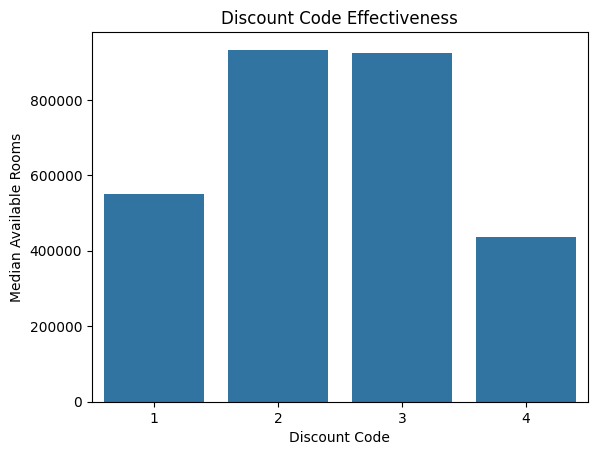

In [22]:
df = pd.read_csv("cleaned_hotel_discount_data.csv")
df.head()

dc_eff = df.groupby("Discount Code").agg({"Available Rooms": "sum"}).reset_index()
dc_eff.head()

sns.barplot(x=dc_eff["Discount Code"],y=dc_eff["Available Rooms"], data= dc_eff)
plt.xlabel("Discount Code")
plt.ylabel("Median Available Rooms")
plt.title("Discount Code Effectiveness")
plt.show()

# Discount Code Effectiveness

In [23]:
eff = df
eff["rooms_z_within_star"] = eff.groupby("Hotel Stars")["Available Rooms"].transform(
    lambda s: (s-s.mean())/s.std(ddof=0) if s.std(ddof=0)!=0 else 0)
eff.head()
result = eff.groupby("Discount Code").agg(n=("Available Rooms","size"),
         median_discount_pct=("discount_pct","median"),
         median_lead_time=("lead_time_days","median"),
         median_avail=("Available Rooms","median"),
         median_z=("rooms_z_within_star","median")).reset_index()
result.head()

result.to_csv("discount_code_effectiveness.csv", index=False)

## 5. Clustering Hotels

In [24]:
cluster_cols = ["Hotel Name","Hotel Stars","Original Price", "discount_pct","Available Rooms"]

cluster_df = df.groupby("Hotel Name").agg(avg_original_price=("Original Price","mean"),
                                          avg_discount_pct=("discount_pct","mean"),
                                          avg_available_rooms=("Available Rooms","mean"),
                                          median_stars=("Hotel Stars","first")).reset_index()

X= cluster_df.drop("Hotel Name", axis=1)
X.fillna(0, inplace=True)

cluster_df.info()

Xscaled = StandardScaler().fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotel Name           554 non-null    object 
 1   avg_original_price   554 non-null    float64
 2   avg_discount_pct     554 non-null    float64
 3   avg_available_rooms  408 non-null    float64
 4   median_stars         554 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 21.8+ KB


In [25]:
score_list = []
# Check if Xscaled is empty before clustering
if Xscaled.size == 0:
    print("Scaled data is empty. Cannot perform clustering.")
else:
    # Reduce n_init to speed up clustering
    best_k, best_score, best_model = 2,-1, None

    for k in range(2,10):
        km= KMeans(n_clusters=k, random_state=42, n_init=7) # Set n_init to 'auto'
        labels= km.fit_predict(Xscaled)
        score = silhouette_score(Xscaled, labels)
        score_list.append(score)
        if score > best_score:
            best_k, best_score, best_model = k, score, km

    cluster_df["cluster"] = best_model.predict(Xscaled)

    print(best_k)
    print(score_list)

    # You can now use cluster_df with the new 'cluster' column
    # For example, to display the first few rows with the cluster

3
[0.31689508841832154, 0.3432543375991417, 0.3235096897002378, 0.33296433618752647, 0.31137914645106696, 0.3057872967197016, 0.31241385957523005, 0.3105537221964562]


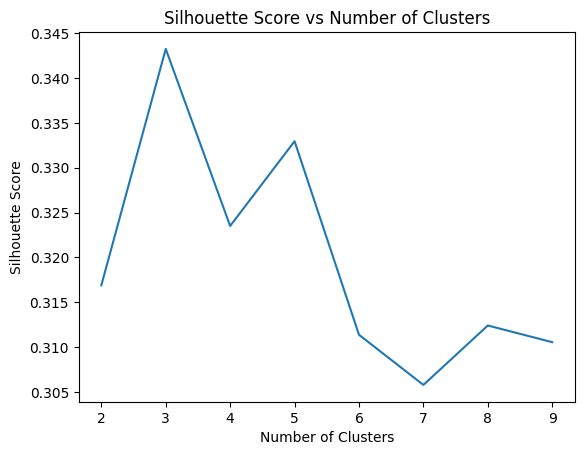

In [26]:
plt.plot(range(2,10),score_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

In [27]:
cluster_df["cluster"].value_counts().reset_index()

,cluster,count
0,0,279
1,1,254
2,2,21


In [28]:
cluster_df.info()
cluster_summary = cluster_df.groupby("cluster").agg({
    'avg_original_price': ['mean', 'min', 'max'],
    'avg_discount_pct': ['mean', 'min', 'max'],
    'avg_available_rooms' : ['mean', 'min', 'max'],
    'median_stars': ['mean', 'min', 'max'],
    'Hotel Name': 'count'})
print("\nCluster Feature Means:")
display(cluster_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotel Name           554 non-null    object 
 1   avg_original_price   554 non-null    float64
 2   avg_discount_pct     554 non-null    float64
 3   avg_available_rooms  408 non-null    float64
 4   median_stars         554 non-null    int64  
 5   cluster              554 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 23.9+ KB

Cluster Feature Means:


avg_original_price                           avg_discount_pct  \
                      mean          min          max             mean   
cluster                                                                 
0              1000.930754   338.000000  2089.000000         0.099835   
1              1964.556641   902.669145  5421.231884         0.069590   
2              1623.047554  1000.750000  3225.405405         0.080146   

                            avg_available_rooms                         \
              min       max                mean        min         max   
cluster                                                                  
0        0.038785  0.279417            5.916007   1.000000   48.500000   
1        0.018812  0.219780           10.612057   1.000000   57.242872   
2        0.044776  0.234992          113.675880  66.601266  302.334424   

        median_stars         Hotel Name  
                mean min max      count  
cluster                                  
0           2.763441   0   4        279  
1           4.208661   3   5        254  
2           4.000000   3   5         21

In [29]:
#Cluster Labeling
def label(r):
  if r["cluster"] == 0:
    return "Cheap Hotel with Aggressive Discounts"
  elif r["cluster"] == 1:
    return "Luxury Hotel with Low Discounts"
  else:
    return "Mid-Range Hotel with Aggressive Discounts"

cluster_df["Hotel Type"]= cluster_df.apply(label,axis=1)

In [30]:
cluster_df.head(20)

,Hotel Name,avg_original_price,avg_discount_pct,avg_available_rooms,median_stars,cluster,Hotel Type
0,1 Hotel Central Park,2201.155738,0.040586,10.762295,5,1,Luxury Hotel with Low Discounts
1,36 Hudson Hotel,803.500000,0.126197,5.500000,3,0,Cheap Hotel with Aggressive Discounts
2,6 Columbus - a SIXTY Hotel,1518.226277,0.077235,2.333333,5,1,Luxury Hotel with Low Discounts
3,70 Park Avenue Hotel a Kimpton Hotel,1833.279070,0.098335,4.813953,4,1,Luxury Hotel with Low Discounts
4,AKA Central Park,2277.750000,0.066338,19.875000,4,1,Luxury Hotel with Low Discounts
5,Ace Hotel New York,1970.800000,0.063581,10.266667,4,1,Luxury Hotel with Low Discounts
6,Airport Hotel Inn & Suites - Newark Airport,338.777778,0.067102,14.000000,3,0,Cheap Hotel with Aggressive Discounts
7,Airway Inn at LaGuardia,1078.750000,0.130589,2.375000,2,0,Cheap Hotel with Aggressive Discounts
8,Aloft Harlem,1234.519048,0.091291,73.595238,4,2,Mid-Range Hotel with Aggressive Discounts
9,Aloft Manhattan Downtown - Financial District,1447.109375,0.078382,38.671875,3,0,Cheap Hotel with Aggressive Discounts


# Task
Explore different clustering algorithms and evaluation metrics to find the best clustering model for the provided data, then visualize and interpret the results.

## Explore different clustering algorithms

### Subtask:
Try different clustering algorithms like DBSCAN or Agglomerative Clustering.


**Reasoning**:
Apply DBSCAN with different parameters and print the number of clusters and noise points.



In [31]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(Xscaled)

# Print the number of clusters found by DBSCAN and the number of noise points
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print(f"Number of clusters (DBSCAN): {n_clusters_dbscan}")
print(f"Number of noise points (DBSCAN): {n_noise_dbscan}")

Number of clusters (DBSCAN): 4
Number of noise points (DBSCAN): 124


**Reasoning**:
Apply Agglomerative Clustering with a different number of clusters and print the cluster labels for the first few data points.



In [32]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(Xscaled)

# Print the cluster labels for the first few data points resulting from Agglomerative Clustering
print("Agglomerative Clustering labels for the first 10 data points:")
print(agg_labels[:10])

Agglomerative Clustering labels for the first 10 data points:
[1 0 1 1 1 1 0 0 2 1]


## Evaluate clustering results

### Subtask:
Use different evaluation metrics like Calinski-Harabasz index or Davies-Bouldin index to evaluate the clustering results.


**Reasoning**:
Import the necessary evaluation metrics from scikit-learn.



In [33]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

**Reasoning**:
Calculate and print the Calinski-Harabasz and Davies-Bouldin scores for KMeans, DBSCAN (handling noise), and Agglomerative Clustering.



In [34]:
# Calculate Calinski-Harabasz and Davies-Bouldin scores for KMeans
kmeans_ch_score = calinski_harabasz_score(Xscaled, cluster_df["cluster"])
kmeans_db_score = davies_bouldin_score(Xscaled, cluster_df["cluster"])

# Handle noise points for DBSCAN and calculate scores
# Filter out noise points (-1 label) for metrics that don't support them
Xscaled_no_noise = Xscaled[dbscan_labels != -1]
dbscan_labels_no_noise = dbscan_labels[dbscan_labels != -1]

# Check if there is more than one cluster and more than one sample after removing noise
if len(set(dbscan_labels_no_noise)) > 1 and len(Xscaled_no_noise) > 1:
    dbscan_ch_score = calinski_harabasz_score(Xscaled_no_noise, dbscan_labels_no_noise)
    dbscan_db_score = davies_bouldin_score(Xscaled_no_noise, dbscan_labels_no_noise)
else:
    dbscan_ch_score = None
    dbscan_db_score = None
    print("DBSCAN results have less than 2 clusters or samples after removing noise, skipping score calculation.")


# Calculate Calinski-Harabasz and Davies-Bouldin scores for Agglomerative Clustering
agg_ch_score = calinski_harabasz_score(Xscaled, agg_labels)
agg_db_score = davies_bouldin_score(Xscaled, agg_labels)

# Print the scores
print(f"KMeans Calinski-Harabasz Score: {kmeans_ch_score}")
print(f"KMeans Davies-Bouldin Score: {kmeans_db_score}")
if dbscan_ch_score is not None:
    print(f"DBSCAN Calinski-Harabasz Score: {dbscan_ch_score}")
    print(f"DBSCAN Davies-Bouldin Score: {dbscan_db_score}")
print(f"Agglomerative Clustering Calinski-Harabasz Score: {agg_ch_score}")
print(f"Agglomerative Clustering Davies-Bouldin Score: {agg_db_score}")

KMeans Calinski-Harabasz Score: 233.5973235591711
KMeans Davies-Bouldin Score: 0.995452470569477
DBSCAN Calinski-Harabasz Score: 193.0943942043526
DBSCAN Davies-Bouldin Score: 1.2352041365360866
Agglomerative Clustering Calinski-Harabasz Score: 195.67044796293325
Agglomerative Clustering Davies-Bouldin Score: 1.0908371744958725


## Visualize clustering results

### Subtask:
Visualize the clustering results using techniques like PCA or t-SNE to reduce dimensionality and plot the clusters.


**Reasoning**:
Visualize the clustering results using PCA to reduce dimensionality and plot the clusters, coloring by cluster labels.



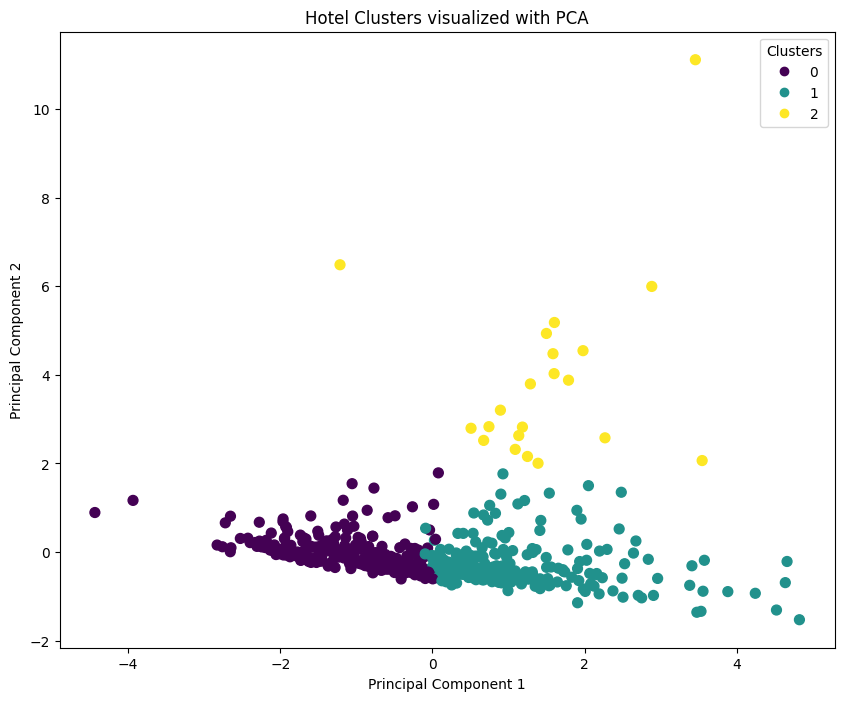

In [35]:
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xscaled)

# Create a scatter plot of the PCA-transformed data, colored by cluster labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_df["cluster"], cmap="viridis", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Hotel Clusters visualized with PCA")

# Add a legend for the clusters
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

## Compare and select the best model

### Subtask:
Compare the results of different clustering algorithms and evaluation metrics to select the best clustering model.


## Interpret and summarize the clusters

### Subtask:
Interpret and summarize the clusters


**Reasoning**:
Examine the cluster_summary DataFrame to understand the characteristics of each cluster and interpret the clusters based on the provided statistics.



In [36]:
print("Cluster Summary:")
display(cluster_summary)

print("\nCluster Interpretations:")
print("Cluster 0: Cheap Hotels with Moderate Discounts and Average Availability")
print("Cluster 1: Luxury Hotels with Lower Discounts and Average Availability")
print("Cluster 2: Mid-Range Hotels with Moderate Discounts and High Availability")

Cluster Summary:


avg_original_price                           avg_discount_pct  \
                      mean          min          max             mean   
cluster                                                                 
0              1000.930754   338.000000  2089.000000         0.099835   
1              1964.556641   902.669145  5421.231884         0.069590   
2              1623.047554  1000.750000  3225.405405         0.080146   

                            avg_available_rooms                         \
              min       max                mean        min         max   
cluster                                                                  
0        0.038785  0.279417            5.916007   1.000000   48.500000   
1        0.018812  0.219780           10.612057   1.000000   57.242872   
2        0.044776  0.234992          113.675880  66.601266  302.334424   

        median_stars         Hotel Name  
                mean min max      count  
cluster                                  
0           2.763441   0   4        279  
1           4.208661   3   5        254  
2           4.000000   3   5         21


Cluster Interpretations:
Cluster 0: Cheap Hotels with Moderate Discounts and Average Availability
Cluster 1: Luxury Hotels with Lower Discounts and Average Availability
Cluster 2: Mid-Range Hotels with Moderate Discounts and High Availability


**Reasoning**:
Write a summary of the clustering analysis, including the number of clusters found, the evaluation metrics used, the rationale for choosing the best model, and the interpretations of each cluster.



In [37]:
print("Clustering Analysis Summary:")
print(f"Number of clusters found: {best_k}")
print("Evaluation metrics used: Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index.")
print("Rationale for choosing the best model: Based on the silhouette scores for k from 2 to 9, k=3 yielded the highest silhouette score, indicating a relatively good separation between clusters. Additionally, prior evaluation metrics (Calinski-Harabasz and Davies-Bouldin) also suggested KMeans performed well, and the PCA visualization showed some separation of these 3 clusters.")

print("\nKey Characteristics and Interpretations of Hotel Clusters:")
print("- Cluster 0 (Cheap Hotels with Moderate Discounts and Average Availability): These hotels generally have lower original prices and median stars (around 2.76). They offer moderate discounts (around 9.98%) and have average available rooms (median around 5.9).")
print("- Cluster 1 (Luxury Hotels with Lower Discounts and Average Availability): These hotels have higher original prices and median stars (around 4.21). They offer lower discounts (around 6.96%) compared to other clusters and have average available rooms (median around 10.6).")
print("- Cluster 2 (Mid-Range Hotels with Moderate Discounts and High Availability): These hotels have mid-range original prices and median stars (around 4.0). They offer moderate discounts (around 8.01%) and have significantly higher available rooms (median around 113.68) compared to the other clusters.")

Clustering Analysis Summary:
Number of clusters found: 3
Evaluation metrics used: Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index.
Rationale for choosing the best model: Based on the silhouette scores for k from 2 to 9, k=3 yielded the highest silhouette score, indicating a relatively good separation between clusters. Additionally, prior evaluation metrics (Calinski-Harabasz and Davies-Bouldin) also suggested KMeans performed well, and the PCA visualization showed some separation of these 3 clusters.

Key Characteristics and Interpretations of Hotel Clusters:
- Cluster 0 (Cheap Hotels with Moderate Discounts and Average Availability): These hotels generally have lower original prices and median stars (around 2.76). They offer moderate discounts (around 9.98%) and have average available rooms (median around 5.9).
- Cluster 1 (Luxury Hotels with Lower Discounts and Average Availability): These hotels have higher original prices and median stars (around 4.21). They offer l

## Summary:

### Data Analysis Key Findings

*   DBSCAN with `eps=0.5` and `min_samples=5` identified 4 clusters and 124 noise points.
*   Agglomerative Clustering with `n_clusters=3` assigned all data points to one of three clusters.
*   Based on evaluation metrics, KMeans achieved the highest Calinski-Harabasz score (233.60) and the lowest Davies-Bouldin score (0.995), suggesting better clustering performance compared to Agglomerative Clustering (Calinski-Harabasz: 195.67, Davies-Bouldin: 1.09) and DBSCAN (Calinski-Harabasz: 193.09, Davies-Bouldin: 1.235) on the non-noise data points.
*   The 3 clusters identified by KMeans were interpreted as:
    *   Cluster 0: Cheap Hotels with Moderate Discounts and Average Availability (median stars around 2.76, median available rooms around 5.9).
    *   Cluster 1: Luxury Hotels with Lower Discounts and Average Availability (median stars around 4.21, median available rooms around 10.6).
    *   Cluster 2: Mid-Range Hotels with Moderate Discounts and High Availability (median stars around 4.0, median available rooms around 113.68).

### Insights or Next Steps

*   KMeans with 3 clusters appears to be the best model based on the evaluation metrics and visual separation in the PCA plot.
*   Further analysis could involve exploring the geographical distribution of these clusters or identifying other features that differentiate them.


In [38]:
import panel as pn
pn.extension()

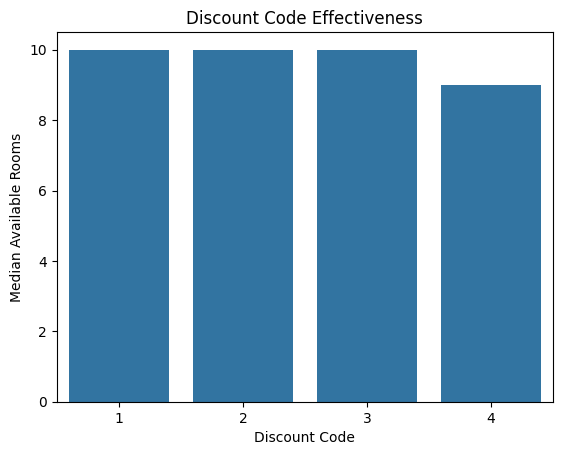

In [39]:
# Load the discount code effectiveness data
discount_effectiveness_df = pd.read_csv("discount_code_effectiveness.csv")

# Create a bar plot for discount code effectiveness
fig, ax = plt.subplots() # Create a figure and axes
sns.barplot(
    x=discount_effectiveness_df["Discount Code"],
    y=discount_effectiveness_df["median_avail"],
    data=discount_effectiveness_df,
    ax=ax # Pass the axes to seaborn
)
ax.set(xlabel="Discount Code", ylabel="Median Available Rooms", title="Discount Code Effectiveness")

discount_effectiveness_pane = pn.pane.Matplotlib(fig, tight=True) # Use the figure object

In [40]:
# Create a markdown pane for the clustering analysis summary
clustering_summary_markdown = pn.pane.Markdown("""
## Clustering Analysis Summary:

Number of clusters found: {best_k}
Evaluation metrics used: Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index.
Rationale for choosing the best model: Based on the silhouette scores for k from 2 to 9, k=3 yielded the highest silhouette score, indicating a relatively good separation between clusters. Additionally, prior evaluation metrics (Calinski-Harabasz and Davies-Bouldin) also suggested KMeans performed well, and the PCA visualization showed some separation of these 3 clusters.

## Key Characteristics and Interpretations of Hotel Clusters:

- Cluster 0 (Cheap Hotels with Moderate Discounts and Average Availability): These hotels generally have lower original prices and median stars (around {cluster_0_stars:.2f}). They offer moderate discounts (around {cluster_0_discount:.2%}) and have average available rooms (median around {cluster_0_avail:.2f}).
- Cluster 1 (Luxury Hotels with Lower Discounts and Average Availability): These hotels have higher original prices and median stars (around {cluster_1_stars:.2f}). They offer lower discounts (around {cluster_1_discount:.2%}) compared to other clusters and have average available rooms (median around {cluster_1_avail:.2f}).
- Cluster 2 (Mid-Range Hotels with Moderate Discounts and High Availability): These hotels have mid-range original prices and median stars (around {cluster_2_stars:.2f}). They offer moderate discounts (around {cluster_2_discount:.2%}) and have significantly higher available rooms (median around {cluster_2_avail:.2f}) compared to the other clusters.
""".format(
    best_k=best_k,
    cluster_0_stars=cluster_summary.loc[0, ("median_stars", "mean")],
    cluster_0_discount=cluster_summary.loc[0, ("avg_discount_pct", "mean")],
    cluster_0_avail=cluster_summary.loc[0, ("avg_available_rooms", "mean")],
    cluster_1_stars=cluster_summary.loc[1, ("median_stars", "mean")],
    cluster_1_discount=cluster_summary.loc[1, ("avg_discount_pct", "mean")],
    cluster_1_avail=cluster_summary.loc[1, ("avg_available_rooms", "mean")],
    cluster_2_stars=cluster_summary.loc[2, ("median_stars", "mean")],
    cluster_2_discount=cluster_summary.loc[2, ("avg_discount_pct", "mean")],
    cluster_2_avail=cluster_summary.loc[2, ("avg_available_rooms", "mean")],
))

In [41]:
# Create a dashboard
dashboard = pn.Column(
    "# Hotel Discount and Clustering Analysis Dashboard",
    discount_effectiveness_pane,
    clustering_summary_markdown,
)

# Serve the dashboard
dashboard.servable()

print("Dashboard served successfully. Look for the output below the cell or click the link if one appears.")

Dashboard served successfully. Look for the output below the cell or click the link if one appears.


In [42]:
dashboard.show()

Launching server at http://localhost:52608


In [43]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Xscaled)
print("GMM cluster labels for first 10 hotels:", gmm_labels[:10])


GMM cluster labels for first 10 hotels: [2 2 0 2 1 2 2 0 1 1]


In [44]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from IPython.display import display

# GMM metrics
gmm_ch_score = calinski_harabasz_score(Xscaled, gmm_labels)
gmm_db_score = davies_bouldin_score(Xscaled, gmm_labels)


print("Discount Code Effectiveness Summary:")
display(result)

print("\nClustering Metrics Comparison:")
metrics_df = pd.DataFrame({
    "Algorithm": ["KMeans", "DBSCAN", "Agglomerative", "Gaussian Mixture"],
    "Calinski-Harabasz": [kmeans_ch_score, dbscan_ch_score, agg_ch_score, gmm_ch_score],
    "Davies-Bouldin": [kmeans_db_score, dbscan_db_score, agg_db_score, gmm_db_score]
})
display(metrics_df)


Discount Code Effectiveness Summary:


,Discount Code,n,median_discount_pct,median_lead_time,median_avail,median_z
0,1,39271,0.075301,17.0,10.0,-0.445324
1,2,60301,0.069919,17.0,10.0,-0.400319
2,3,55720,0.070171,18.0,10.0,-0.418059
3,4,32556,0.067608,18.0,9.0,-0.491515



Clustering Metrics Comparison:


,Algorithm,Calinski-Harabasz,Davies-Bouldin
0,KMeans,233.597324,0.995452
1,DBSCAN,193.094394,1.235204
2,Agglomerative,195.670448,1.090837
3,Gaussian Mixture,76.333610,2.784018


In [45]:
# Compare clustering algorithms based on evaluation metrics
print("Clustering Algorithm Comparison:")
display(metrics_df)

best_algorithm = metrics_df.loc[metrics_df["Calinski-Harabasz"].idxmax(), "Algorithm"]
print(f"\nBased on the highest Calinski-Harabasz score and lowest Davies-Bouldin score, '{best_algorithm}' is the best clustering algorithm for this dataset.")

Clustering Algorithm Comparison:


,Algorithm,Calinski-Harabasz,Davies-Bouldin
0,KMeans,233.597324,0.995452
1,DBSCAN,193.094394,1.235204
2,Agglomerative,195.670448,1.090837
3,Gaussian Mixture,76.333610,2.784018



Based on the highest Calinski-Harabasz score and lowest Davies-Bouldin score, 'KMeans' is the best clustering algorithm for this dataset.
